<a href="https://colab.research.google.com/github/echou024/ImageClassificationOnHandwrittenDigits/blob/main/ImageClassificationOnHandwrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
Performs image classification on a handwritten digits dataset using a two-layer neural network with loss functions, gradients, optimizers.


We will use [MNIST](https://en.wikipedia.org/wiki/MNIST_database) handwritten digits dataset. The dataset consists 10 handwritten digits (0,1,...,9).
The training data consists of 60000 images of size $28 \times 28$ pixels; the test data consists of 10000 images.

We will use the functionality of Pandas (https://pandas.pydata.org/), Matplotlib (https://matplotlib.org/), and Numpy (http://www.numpy.org/).



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# make sure you import here everything else you may need

11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


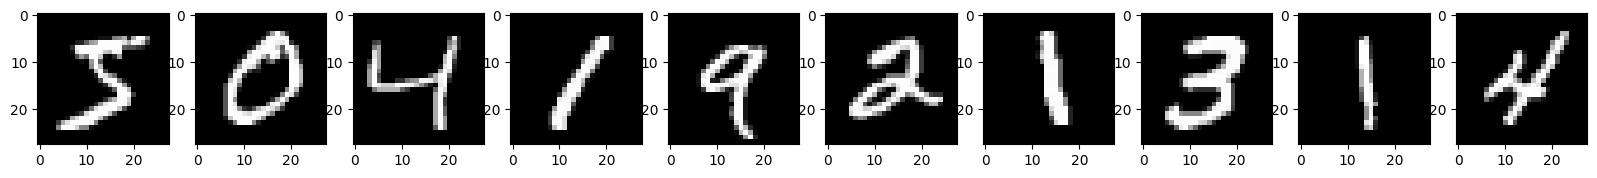

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training data shape:',x_train.shape)
print('Test data shape:',x_test.shape)

n_img=10
plt.figure(figsize=(n_img*2,2))
plt.gray()
for i in range(n_img):
    plt.subplot(1,n_img,i+1)
    plt.imshow(x_train[i])
plt.show()

We will be vectorizing the training and test images. So, the size of each vector will be 784.

In [3]:
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)

print('Training data shape after reshaping:',x_train.shape)
print('Test data shape after reshaping::',x_test.shape)
print("\n")
print('Training label shape: ', y_train.shape)
print('Test label shape: ', y_test.shape)

Training data shape after reshaping: (60000, 784)
Test data shape after reshaping:: (10000, 784)


Training label shape:  (60000,)
Test label shape:  (10000,)


## Binary classification using neural network:

We will classify images of two different digits using a two-layer network with a cross entropy loss.


In [4]:
def extract_binary_classification_dataset(x, y, label1, label2, num_samples):
    """Make a subset dataset from MNIST, containing only 2 classes for binary classification task
    Args:
        x (numpy.ndarray): data, can be x_train or x_test
        y (numpy.ndarray): labels of data, can be y_train or y_test
        label1 (int): the first class you pick, e.g. 5
        label2 (int): the second class you pick, e.g. 8
        num_samples (int): the number of images you select for each class, e.g. 1000
    Returns:
        x_ (numpy.ndarray): the data for 2 picked classes
        y_ (numpy.ndarray): the corresponding labels for 2 picked classes
    """
    # for class 1
    x1 = x[y == label1]
    x1 = x1[:num_samples]
    y1 = np.zeros(len(x1))

    # for class 2
    x2 = x[y == label2]
    x2 = x2[:num_samples]
    y2 = np.ones(len(x2))

    # combine 2 classes
    x_ = np.concatenate((x1,x2),axis=0)
    y_ = np.concatenate((y1,y2),axis=0)
    return x_, y_


# Pick your own digits
label1 = 5
label2 = 8
num_samples = 1000

# Train & test data
train_x, train_y = extract_binary_classification_dataset(x_train, y_train, label1, label2, num_samples)
test_x, test_y = extract_binary_classification_dataset(x_test, y_test, label1, label2, num_samples)

# reshape data
train_x = train_x.T
test_x = test_x.T
print("Training data shape:", train_x.shape)
print("Test data shape:", test_x.shape)

Training data shape: (784, 2000)
Test data shape: (784, 1866)


### Network Architecture:

We will be using a two layer neural network in our experiment. The input layer will have 784 nodes, the hidden layer will have 256 nodes and the output layer will have 1 node. Each node will have $\textit{sigmoid}$ activation function.

The equations for feedforward operation will be the following:

$$\mathbf{z}^{(1)}=W^{(1)} \mathbf{x}+ \mathbf{b}^{(1)}\\\mathbf{y}^{(1)}=\varphi(\mathbf{z}^{(1)})\\\mathbf{z}^{(2)}=W^{(2)}  \mathbf{y}^{(1)}+ \mathbf{b}^{(2)} \\\mathbf{y}^{(2)}=\varphi(\mathbf{z}^{(2)})$$

where $\mathbf{x}\in \mathbb{R}^{784}$ is the input layer, $\mathbf{y}^{(1)}\in \mathbb{R}^{256}$ is the hidden layer, $\mathbf{y}^{(2)} \in \mathbb{R}$ is the output layer, $W^{(1)}\in \mathbb{R}^{256\times 784}$ is the first layer weights, $W^{(2)}\in \mathbb{R}^{1\times 256}$ is the second layer weights, $\mathbf{b}^{(1)}\in \mathbb{R}^{256}$ is the first layer bias, $\mathbf{b}^{(2)}\in \mathbb{R}$ is the second layer bias, $\varphi(\cdot)$ is the activation function.

### Network initialization:

We initialize the weights for $W^{(1)}$ and $W^{(2)}$ with random values drawn from normal distribution with zero mean and 0.01 standard deviation. We will initialize bias vectors $\mathbf{b}^{(1)}$ and $\mathbf{b^{(2)}}$ with zero values.

We can fix the seed for random initialization for reproducibility.

In [5]:
def TwoLayerNetwork(layer_dims=[784,256,1]):
    # Fix the seed
    np.random.seed(3)

    # TODO
    # Your code goes here
    W1 = np.random.normal(0, 0.01, (layer_dims[1], layer_dims[0]))

    b1 = np.zeros((layer_dims[1], 1))

    W2 = np.random.normal(0, 0.01, (layer_dims[2], layer_dims[1]))

    b2 = np.zeros((layer_dims[2], 1))

    params = [W1, b1, W2, b2]


    return params

### Sigmoid activation function:

$$ \varphi(z) = \frac{1}{1+e^{-z}}$$


In [6]:
def sigmoid(Z):
    # Input: Z -- numpy.ndarray
    # TODO
    # Write your function

    Y = 1 / (1 + np.exp(-Z))

    return Y



### Derivative of Sigmoid activation function:

$\varphi'(z) = \varphi(z) (1-\varphi(z))$



In [7]:
def derivative_sigmoid(Z):
    # Input: Z -- numpy.ndarray
    # TODO
    # Write your function

    grad = sigmoid(Z) * (1 - sigmoid(Z))

    return grad

### Cross entropy loss function:
We will minimize the binary cross entropy loss function using the true labels and predicted labels of a batch of N samples.

Binary crossentropy loss for $i^{th}$ sample can be written as

$$Loss_i = -y_i \log y^{(2)}_i- (1-y_i) \log (1-y^{(2)}_i)$$

where $y_i$ is the true label. We can find the average loss for a batch of N samples as $Loss=\frac{1}{N}\sum_{i=1}^{N} Loss_i$.

Note that the gradient of the cross entropy loss w.r.t. the output is

$$ \nabla_{y^{(2)}} Loss_i = -\frac{y_i}{y_i^{(2)}} + \frac{1-y_i}{1-y_i^{(2)}} = \frac{y_i^{(2)}-y_i}{y_i^{(2)}(1-y_i^{(2)})}.$$

We can also show that $$\delta^{(2)} = \nabla_{\mathbf{z}^{(2)}} Loss_i  = \nabla_{y^{(2)}} Loss_i \odot \varphi'(\mathbf{z})= y_i^{(2)}-y_i,$$
where $\odot$ denotes element-wise multiplication of the arrays.

In [8]:
def CrossEntropyLoss(Y_true, Y2):
    # TODO
    # Write your code here
    loss = np.mean(-(Y_true * np.log(Y2) + (1 - Y_true) * np.log(1 - Y2)))

    return loss

### Forward propagation:
Next, we code the forward pass for two layer network. Each layer consists of an affine function (fully-connected layer) followed by an activation function. We also return the intermediate results ($\mathbf{x}, \mathbf{z}^{(1)}, \mathbf{y}^{(1)}, \mathbf{z}^{(2)}$) in addition to final output ($\mathbf{y}^{(2)}$). They are needed for the intermediate outputs for the backpropagation step.

In [9]:
def forward(X, params):
    # TODO
    # Write your codes here
    # X -- 784 x N array
    # params --
      # W1 -- 256 x 784 matrix
      # b1 -- 256 x 1 vector
      # W2 -- 1 x 256 matrix
      # b2 -- 1 x 1 scalar
    # Y2 -- 1 x N output
    # intermediate -- X, Z1, Y1, Z2
      # Z1 -- 256 x N matrix
      # Y1 -- 256 x N matrix
      # Z2 -- 1 x N array
      W1, b1, W2, b2 = params

      Z1 = np.dot(W1, X) + b1
      Y1 = sigmoid(Z1)
      Z2 = np.dot(W2, Y1) + b2
      Y2 = sigmoid(Z2)

      intermediate = [X, Z1, Y1, Z2]

      return Y2, intermediate

### Back propagation step:

We need the gradient of the Loss w.r.t. $W^{(l)},\mathbf{b}^{(l)}$ for $l = 1,2$ for all the training samples.  



We saw that we can write the gradient of Loss with respect to $W^{(l)}, \mathbf{b}^{(l)}$ for a single sample as

$$\nabla_{W^{(l)}} Loss_i = \delta^{(l)} \mathbf{y}^{(l-1)T},$$  
$$\nabla_{\mathbf{b}^{(l)}} Loss_i = \delta^{(l)},$$

where
$$\delta^{(l)} = \nabla_{\mathbf{z}^{(l)}} Loss_i = \nabla_{\mathbf{y}^{(l)}} Loss_i \odot \varphi'(\mathbf{z}^{(l)}).$$


For the the last layer, we can compute $\delta^{(L)}$ by plugging the value of $\nabla_{\mathbf{y}^{(L)}} Loss$ as described above.

For the intermediate layers $l<L$, we can write
$$\delta^{(l)} = W^{(l+1)T}\delta^{(l+1)} \odot \varphi'(\mathbf{z}^{(l)}).$$



**Once we have the gradients $\nabla_{W^{(l)}} Loss_i, \nabla_{\mathbf{b}^{(l)}} Loss_i$ for all $i$. We can compute their average to compute the gradient of the total loss function $\frac{1}{N} \sum_{i=1}^N Loss_i$ as**

$$\nabla_{W^{(l)}} Loss = \frac{1}{N} \sum_i \nabla_{W^{(l)}} Loss_i, $$
$$ \nabla_{\mathbf{b}^{(l)}} Loss = \frac{1}{N} \sum_i  \nabla_{\mathbf{b}^{(l)}} Loss_i.$$

In [10]:
def backward(Y_true, Y2, intermediate, params):

    # Inputs:
      # Y_true -- 1 x N true labels
      # Y2 -- 1 x N output of the last layer
      # intermediate -- X, Z1, Y1, Z2
      # params -- W1, b1, W2, b2

    # Outputs:
      # grads -- [grad_W1, grad_b1, grad_W2, grad_b2]

    # TODO
    # Write your codes here
    # Check dimensions of inputs

    # Y_true = Y_true.reshape(1, -1)
    # Y2 = Y2.reshape(1, -1)

    X, Z1, Y1, Z2 = intermediate
    W1, b1, W2, b2 = params

    delta2 = Y2 - Y_true

    gradW2 = np.dot(delta2, Y1.T) / 2000
    gradb2 = np.mean(delta2)

    delta1 = np.dot(W2.T, delta2) * derivative_sigmoid(Z1)

    gradW1 = np.dot(delta1, X.T) / 2000
    gradb1 = np.mean(delta1)


    grads = [gradW1, gradb1, gradW2, gradb2]

    return grads, intermediate

### Optimizer:
We use a standard gradient descent-based optimizer to minimize the loss function.

Update $W^1, \mathbf{b}^1, W^2, \mathbf{b}^2$ as
$$ W^1 \gets W^1 - \alpha \nabla_{W^1} Loss $$
$$ \mathbf{b}^1 \gets \mathbf{b}^1 - \alpha \nabla_{\mathbf{b}^1} Loss $$
$$ W^2 \gets W^2 - \alpha \nabla_{W^2} Loss $$
$$ \mathbf{b}^2 \gets \mathbf{b}^2 - \alpha \nabla_{\mathbf{b}^2} Loss $$
$\alpha$ is the learning rate.

In [11]:
def GD(params, grads, learning_rate):

    # updated params = old params - learning rate * gradient of Loss computed at old params
    # TODO
    # Write your codes here

    W1, b1, W2, b2 = params

    gradW1, gradb1, gradW2, gradb2 = grads

    updatedW1 = W1 - (learning_rate * gradW1)

    updatedb1 = b1 - (learning_rate * gradb1)

    updatedW2 = W2 - (learning_rate * gradW2)

    updatedb2 = b2 - (learning_rate * gradb2)

    updated_params = [updatedW1, updatedb1, updatedW2, updatedb2]

    return updated_params

### Train the Model:


In [12]:
layer_dims = [train_x.shape[0],256,1]
epochs = 1000
lr = 0.00001

params = TwoLayerNetwork(layer_dims)

In [13]:
# TODO
# Write your codes here

loss_history = []

for i in range(epochs):
  #1. Calculate the forward pass to get estimated labels.
  estimatedY, returnedIntermediate = forward(train_x, params)

  #2. Use the estimated labels calculate loss. We will be recording loss for every epoch.
  estimatedLoss = CrossEntropyLoss(train_y, estimatedY)
  loss_history.append(estimatedLoss)

  #3. Use backpropagation to calculate gradients.
  newGrads, returnedIntermediate2 = backward(train_y, estimatedY, returnedIntermediate, params)

  #4. Use gradient descent to update the weights and biases.
  params = GD(params, newGrads, lr)

  #Print the loss value after every few epochs (say 20)
  if i % 20 == 0:
    print(f'Epoch {i}/{epochs}, Loss: {estimatedLoss}')





Epoch 0/1000, Loss: 0.6913401911077485
Epoch 20/1000, Loss: 0.6911374419854458
Epoch 40/1000, Loss: 0.6909350387860089
Epoch 60/1000, Loss: 0.690732981508076
Epoch 80/1000, Loss: 0.6905312701694367
Epoch 100/1000, Loss: 0.6903299047905626
Epoch 120/1000, Loss: 0.690128885378682
Epoch 140/1000, Loss: 0.6899282119130171
Epoch 160/1000, Loss: 0.6897278843317799
Epoch 180/1000, Loss: 0.689527902521461
Epoch 200/1000, Loss: 0.689328266308811
Epoch 220/1000, Loss: 0.689128975455742
Epoch 240/1000, Loss: 0.688930029657168
Epoch 260/1000, Loss: 0.6887314285415909
Epoch 280/1000, Loss: 0.6885331716740316
Epoch 300/1000, Loss: 0.6883352585607402
Epoch 320/1000, Loss: 0.6881376886550008
Epoch 340/1000, Loss: 0.6879404613632971
Epoch 360/1000, Loss: 0.6877435760511185
Epoch 380/1000, Loss: 0.6875470320477755
Epoch 400/1000, Loss: 0.6873508286497254
Epoch 420/1000, Loss: 0.6871549651220944
Epoch 440/1000, Loss: 0.6869594406982796
Epoch 460/1000, Loss: 0.686764254577721
Epoch 480/1000, Loss: 0.68656

Now we will plot the recorded loss values vs epochs. We will observe the training loss decreasing with the epochs.

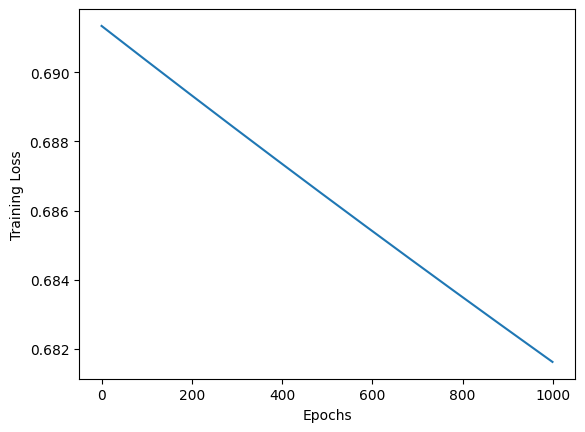

In [14]:
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show()

### Evaluation on test data:

Now we will be evaluating the accuracy we get from the trained model. We feed training data and test data to the forward model along with the trained parameters.

In [15]:
# TODO

trainProb, inter1 = forward(train_x, params)
testProb, inter2 = forward(test_x, params)

binaryClassTr = []
for probTr in trainProb.flatten():
    if probTr >= 0.5:
        binaryClassTr.append(1)
    else:
        binaryClassTr.append(0)

binaryClassTs = []
for probTs in testProb.flatten():
    if probTs >= 0.5:
        binaryClassTs.append(1)
    else:
        binaryClassTs.append(0)

binaryClassTr = np.array(binaryClassTr)
binaryClassTs = np.array(binaryClassTs)

# Calculate accuracy
accTr = (binaryClassTr == train_y).mean()
accTs = (binaryClassTs == test_y).mean()

print("Training accuracy:", accTr)
print("Test accuracy:", accTs)


Training accuracy: 0.5035
Test accuracy: 0.5251875669882101
